# Facial Keypoints Detection

## Intro

Each predicted keypoint is specified by an (x,y) real-valued pair in the space of pixel indices. There are 15 keypoints, which represent the following elements of the face.

The input image is given in the last field of the data files, and consists of a list of pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_PATH = '/kaggle/input/facialkeypointsdetection/training.csv'
TEST_PATH = '/kaggle/input/facialkeypointsdetection/test.csv'
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [4]:
df_train.head().T

,0,1,2,3,4
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179,39.621261
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713,72.515926
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967,39.884466
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643,36.98238
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115,39.094852


In [5]:
print("Before drop null", df_train.shape)
df_train = df_train.dropna()
print("After drop null", df_train.shape)

Before drop null (7049, 31)
After drop null (2140, 31)


In [6]:
df_train['Image'] = df_train['Image'].apply(lambda x: np.fromstring(x, sep=' '))
df_train['Image'][0]

array([238., 236., 237., ...,  70.,  75.,  90.])

In [7]:
df_train[df_train.columns[:-1]].iloc[0].values

array([66.03356391, 39.00227368, 30.22700752, 36.4216782 , 59.58207519,
       39.64742256, 73.13034586, 39.96999699, 36.35657143, 37.3894015 ,
       23.45287218, 37.3894015 , 56.95326316, 29.03364812, 80.22712782,
       32.22813835, 40.22760902, 29.0023218 , 16.35637895, 29.64747068,
       44.42057143, 57.06680301, 61.19530827, 79.97016541, 28.61449624,
       77.38899248, 43.3126015 , 72.93545865, 43.13070677, 84.48577444])

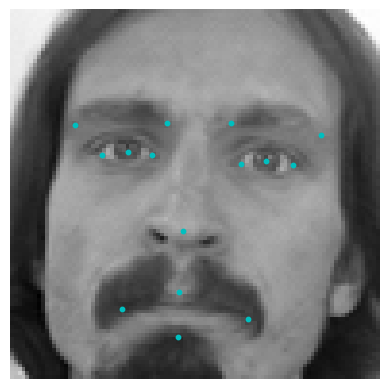

In [8]:
plt.imshow(df_train['Image'][0].reshape(96,96),cmap='gray')
plt.axis('off')
face_points = df_train[df_train.columns[:-1]].iloc[0].values
plt.scatter(face_points[0::2], face_points[1::2], marker='o', c='c', s=10)
plt.show()

After the simple EDA process, we can see from the first image, the keypoints have been labeled on the face. This dataset contains a bunch of null values, we drop all of them to make sure it is clean and simple. However, to keep the code more readable and compact, we will use a pipeline to prepare the data.

## Model

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
def preprocess(path):

    df = pd.read_csv(path)
    df = df.dropna()  
    df['Image'] = df['Image'].apply(lambda x: np.fromstring(x, sep=' '))


    # Normalize the pixel values, scale values between 0 and 1
    X = np.vstack(df['Image'].values) / 255.  
    # return each images as 96 x 96 x 1
    X = X.reshape(-1, 96, 96, 1) 
    X = X.astype(np.float32)

    y = df[df.columns[:-1]].values 
    # Normalize the target value, scale values between 0 and 1
    scaler = StandardScaler()
    y = scaler.fit_transform(y)
    y = y.astype(np.float32)
    # shuffle train data 
    X, y = shuffle(X, y, random_state=42)  

    return X,y,scaler

In [10]:
X_train, y_train, scaler = preprocess(TRAIN_PATH)
X_train.shape, y_train.shape

((2140, 96, 96, 1), (2140, 30))

In [11]:
def plot_data(img, face_points,scaler):
    # Plot the image
    plt.imshow(np.squeeze(img), cmap='gray')
    face_points = scaler.inverse_transform(face_points.reshape(1, -1)).flatten()
    # Plot the keypoints
    plt.scatter(face_points[0::2], face_points[1::2], marker='o', c='c', s=10)
    plt.axis('off')
    plt.show()

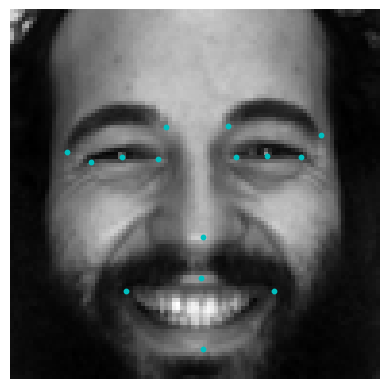

In [12]:
plot_data(X_train[0], y_train[0],scaler)

### Baseline-CNN

In [13]:
import torch
from torch import nn

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(1, 32, 5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.1)
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(64, 128, 3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.2)
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(128, 256, 3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.3)
        )
        self.block5 = nn.Sequential(
            nn.Conv2d(256, 256, 3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.3)
        )
        self.clf = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256, 512), 
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 30),
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = self.clf(x)
        return x

In [14]:
from torch.utils.data import DataLoader, TensorDataset, random_split

def create_loader(X_train, y_train,batch_size):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16,shuffle=False)
    return train_loader, val_loader

In [15]:
BATCH_SIZE = 128
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn = CNN()
train_loader, val_loader = create_loader(X_train, y_train, BATCH_SIZE)
optimizer = torch.optim.AdamW(cnn.parameters(), lr=0.01)
loss_func = nn.MSELoss()

In [16]:
!pip install mlflow 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 65.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 4.2.4
    Uninstalling cachetools-4.2.4:
      Successfully uninstalled cachetools-4.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.4.1 requires cubinlinker, which is not installed.
cudf 24.4.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.4.1 requires ptxcompiler, which is not installed.
cuml 24.4.0 requires cupy-cuda11x>=12.0.0, which is not installed.


In [18]:
import mlflow
import mlflow.pytorch
import os

def train_model(model, optimizer, loss_func, train_loader, val_loader, device, epochs=100):
    model = model.to(device)
    with mlflow.start_run():
        mlflow.log_param("batch_size", train_loader.batch_size)
        mlflow.log_param("epochs", epochs)
        
        for epoch in range(epochs):
            model.train()
            train_loss, train_rmse, train_mae = 0.0, 0.0, 0.0
            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = loss_func(outputs, targets)
                
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item() 
                train_rmse += torch.sqrt(torch.mean((outputs - targets) ** 2)).item()
                train_mae += torch.mean(torch.abs(outputs - targets)).item()
            
            train_loss /= len(train_loader)
            train_rmse /= len(train_loader)
            train_mae /= len(train_loader)
            
            mlflow.log_metric("train_loss", train_loss, step=epoch)
            mlflow.log_metric("train_rmse", train_rmse, step=epoch)
            mlflow.log_metric("train_mae", train_mae, step=epoch)
            
            model.eval()
            val_loss, val_rmse, val_mae = 0.0, 0.0, 0.0
            with torch.no_grad():
                for inputs, targets in val_loader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss = loss_func(outputs, targets)
                    val_loss += loss.item()
                    val_rmse += torch.sqrt(torch.mean((outputs - targets) ** 2)).item()
                    val_mae += torch.mean(torch.abs(outputs - targets)).item()
            
            val_loss /= len(val_loader)
            val_rmse /= len(val_loader)
            val_mae /= len(val_loader)
            
            mlflow.log_metric("val_loss", val_loss, step=epoch)
            mlflow.log_metric("val_rmse", val_rmse, step=epoch)
            mlflow.log_metric("val_mae", val_mae, step=epoch)
            
            if epoch % 20 == 0:
                print(f'Epoch {epoch+1}/{epochs}:')
                print(f'Train - Loss: {train_loss:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}')
                print(f'Val - Loss: {val_loss:.4f}, RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}')

        mlflow.pytorch.log_model(model, "cnn")

def save_model(model, save_dir, model_name):
   
    os.makedirs(save_dir, exist_ok=True)
    
    # Save the entire model
    torch.save(model, os.path.join(save_dir, f"{model_name}.pth"))
    
    # Save the state dictionary
    torch.save(model.state_dict(), os.path.join(save_dir, f"{model_name}_state_dict.pth"))
    
    print(f"Model saved in {save_dir} as {model_name}.pth and {model_name}_state_dict.pth")

        

In [19]:
SAVE_PATH = '/kaggle/working/'
train_model(cnn, optimizer, loss_func, train_loader, val_loader, device, epochs=200)
save_model(cnn, SAVE_PATH, 'CNN')

Epoch 1/200:
Train - Loss: 1.5295, RMSE: 1.0526, MAE: 0.8084
Val - Loss: 1.0411, RMSE: 1.0112, MAE: 0.7633
Epoch 21/200:
Train - Loss: 0.9920, RMSE: 0.9894, MAE: 0.7531
Val - Loss: 1.0430, RMSE: 1.0121, MAE: 0.7645
Epoch 41/200:
Train - Loss: 0.9923, RMSE: 0.9873, MAE: 0.7530
Val - Loss: 1.0427, RMSE: 1.0119, MAE: 0.7641
Epoch 61/200:
Train - Loss: 0.9928, RMSE: 0.9906, MAE: 0.7533
Val - Loss: 1.0411, RMSE: 1.0112, MAE: 0.7633
Epoch 81/200:
Train - Loss: 0.9916, RMSE: 0.9902, MAE: 0.7527
Val - Loss: 1.0407, RMSE: 1.0111, MAE: 0.7635
Epoch 101/200:
Train - Loss: 0.9923, RMSE: 0.9893, MAE: 0.7531
Val - Loss: 1.0432, RMSE: 1.0121, MAE: 0.7643
Epoch 121/200:
Train - Loss: 0.9921, RMSE: 0.9885, MAE: 0.7531
Val - Loss: 1.0413, RMSE: 1.0112, MAE: 0.7632
Epoch 141/200:
Train - Loss: 0.9918, RMSE: 0.9891, MAE: 0.7529
Val - Loss: 1.0402, RMSE: 1.0108, MAE: 0.7629
Epoch 161/200:
Train - Loss: 0.9917, RMSE: 0.9881, MAE: 0.7529
Val - Loss: 1.0413, RMSE: 1.0114, MAE: 0.7635
Epoch 181/200:
Train - Lo

### Finetuned - ResNet

In [20]:
from torchvision import models
model = models.resnet18()
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))

layer = model.conv1

        
# creating new Conv2d layer
new_layer = nn.Conv2d(in_channels=1, 
                  out_channels=layer.out_channels, 
                  kernel_size=layer.kernel_size, 
                  stride=layer.stride, 
                  padding=layer.padding)

new_layer.weight = nn.Parameter(torch.mean(layer.weight, dim=1, keepdim=True))

model.conv1 = new_layer
model.fc = nn.Linear(512, 30)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)
loss_func = nn.MSELoss()

train_model(model, optimizer, loss_func, train_loader, val_loader, device, epochs=200)
save_model(cnn, SAVE_PATH, 'Resnet18')

Epoch 1/200:
Train - Loss: 1.3016, RMSE: 1.0840, MAE: 0.8342
Val - Loss: 1.0544, RMSE: 1.0178, MAE: 0.7675
Epoch 21/200:
Train - Loss: 0.0759, RMSE: 0.2745, MAE: 0.2107
Val - Loss: 0.2842, RMSE: 0.5135, MAE: 0.3453
Epoch 41/200:
Train - Loss: 0.0417, RMSE: 0.2034, MAE: 0.1567
Val - Loss: 0.2523, RMSE: 0.4750, MAE: 0.3106
Epoch 61/200:
Train - Loss: 0.0341, RMSE: 0.1837, MAE: 0.1413
Val - Loss: 0.2667, RMSE: 0.4893, MAE: 0.3199
Epoch 81/200:
Train - Loss: 0.0334, RMSE: 0.1808, MAE: 0.1377
Val - Loss: 0.2650, RMSE: 0.4873, MAE: 0.3135
Epoch 101/200:
Train - Loss: 0.0243, RMSE: 0.1547, MAE: 0.1183
Val - Loss: 0.2529, RMSE: 0.4740, MAE: 0.3032
Epoch 121/200:
Train - Loss: 0.0240, RMSE: 0.1536, MAE: 0.1175
Val - Loss: 0.2586, RMSE: 0.4818, MAE: 0.3096
Epoch 141/200:
Train - Loss: 0.0191, RMSE: 0.1370, MAE: 0.1052
Val - Loss: 0.2535, RMSE: 0.4744, MAE: 0.3039
Epoch 161/200:
Train - Loss: 0.0187, RMSE: 0.1357, MAE: 0.1040
Val - Loss: 0.2547, RMSE: 0.4756, MAE: 0.3052
Epoch 181/200:
Train - Lo

/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


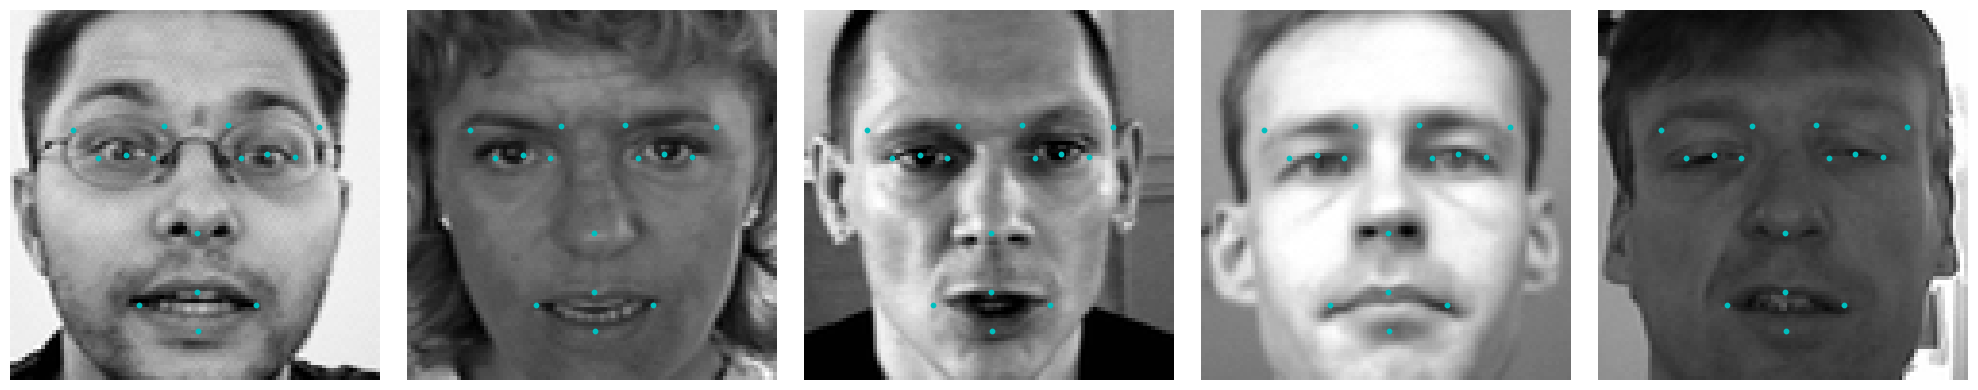

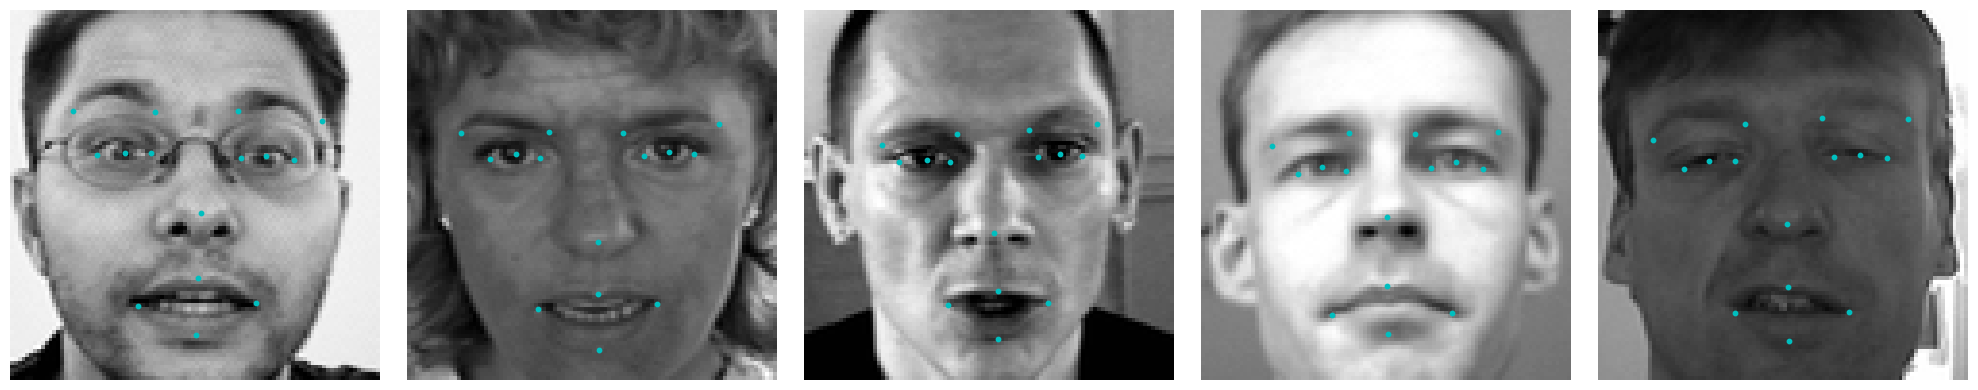

In [40]:
def preprocess_test_data(test_path):
    df_test = pd.read_csv(test_path)
    df_test['Image'] = df_test['Image'].apply(lambda x: np.fromstring(x, sep=' '))
    X_test = np.vstack(df_test['Image'].values) / 255.
    X_test = X_test.reshape(-1, 96, 96, 1)
    X_test = X_test.astype(np.float32)
    return X_test

def visualize_predictions(model, X_test, scaler, num_samples=5):
    model.eval()
    with torch.no_grad():
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2)
        predictions = model(X_test_tensor.to(device)).cpu().numpy()
    
    predictions = scaler.inverse_transform(predictions)
    
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    for i in range(num_samples):
        axes[i].imshow(np.squeeze(X_test[i]), cmap='gray')
        axes[i].scatter(predictions[i][0::2], predictions[i][1::2], marker='o', c='c', s=10)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()


X_test = preprocess_test_data(TEST_PATH)
visualize_predictions(cnn, X_test, scaler)  # For CNN model
visualize_predictions(model, X_test, scaler)  # For ResNet18 model

## Comparison

From the two models customized CNN and finetuned ResNet, the last one performs better on the loss, RMSE and MAE. But the validation loss is 10 times larger than the train loss, so it may suggests there may be an overfitting. But to determine it is or not we still need cross valiation for further analysis. However, according to the test results, both of them are good.